<a href="https://colab.research.google.com/github/jlschwartz3/bio108_week_11_tutorial/blob/main/Data_Science_Homework_Week_11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Rain, rain, go away? Or rain, rain, come?

Across the world, scientists are working to predict the effects of climate change on spatial and temporal levels. Global climate models, or GCMs, attempt to mathematically represent the complex processes of the Earth's climate system, including land surface, oceans, and the atmosphere. In the face of accelerating climate change, these models can be used to predict future climate data.

Globally, cycles of rainfall dictate when to sow and harvest crops. Expected precipitation values for given months are essential to planning tilling, purchasing seeds, and determining if certain crops can continue to thrive in certain regions.

Using projected climate data, we will examine how precipitation seasonality varies across a given geographic region (here, we will focus on Africa), and how that could impact agricultural patterns in the next 2 decades.

The data come from WorldClim's future climate data projections for 2021-2040. It comes from the EC-Earth3-Veg GCM, a model that focuses on changes in vegetation types and distribution in response to climate change, and uses the Shared Socio-economic Pathway (SSP) 126, which refers to a low-emissions projection of future radiative forcing. The data is at the 10 minute spatial resolution, the most coarse of WorldClim's data.

In [ ]:
! pip install rasterio fiona #install rasterio library, which is not pre-loaded into Colab

In [ ]:
import rasterio #install all necessary packages for working with raster data
import rasterio.plot
import matplotlib.pyplot as plt

In [ ]:
raster_path = (
    "/content/drive/MyDrive/BIO 109 Data Science/wc2.1_10m_prec_EC-Earth3-Veg_ssp126_2021-2040.tif" ##swap with whatever my raster is
) #read in the raster data from .tif file, which was uploaded into Drive for ease of download
src = rasterio.open(raster_path)
print(src)

<open DatasetReader name='/content/drive/MyDrive/BIO 109 Data Science/wc2.1_10m_prec_EC-Earth3-Veg_ssp126_2021-2040.tif' mode='r'>


In [ ]:
src.meta #examine metadata. Important: shows coordinate reference system and number of bands present, 12.

{'driver': 'GTiff',
 'dtype': 'float32',
 'nodata': nan,
 'width': 2160,
 'height': 1080,
 'count': 12,
 'crs': CRS.from_wkt('GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AXIS["Latitude",NORTH],AXIS["Longitude",EAST],AUTHORITY["EPSG","4326"]]'),
 'transform': Affine(0.16666666666666666, 0.0, -180.0,
        0.0, -0.16666666666666666, 90.0)}

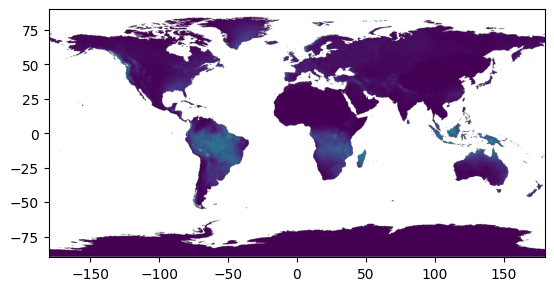

<Axes: >

In [ ]:
rasterio.plot.show(src) #plot the data

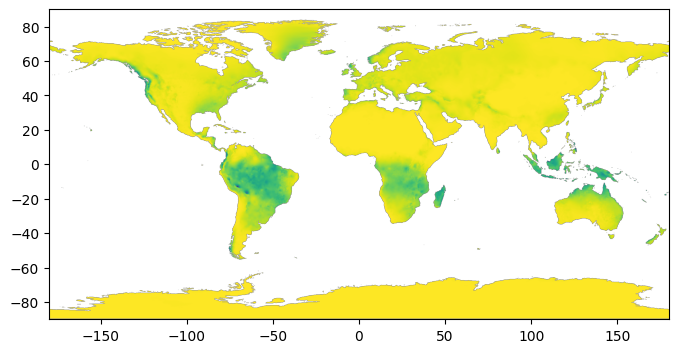

In [ ]:
fig, ax = plt.subplots(figsize=(8, 8)) #plot again, but introduce a new colormap to better visualize data
rasterio.plot.show(src, cmap="viridis_r", ax=ax)
plt.show()

In [ ]:
band_names = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"] #name all of the 12 bands present in the
#dataset, which correspond to the 12 months of the year

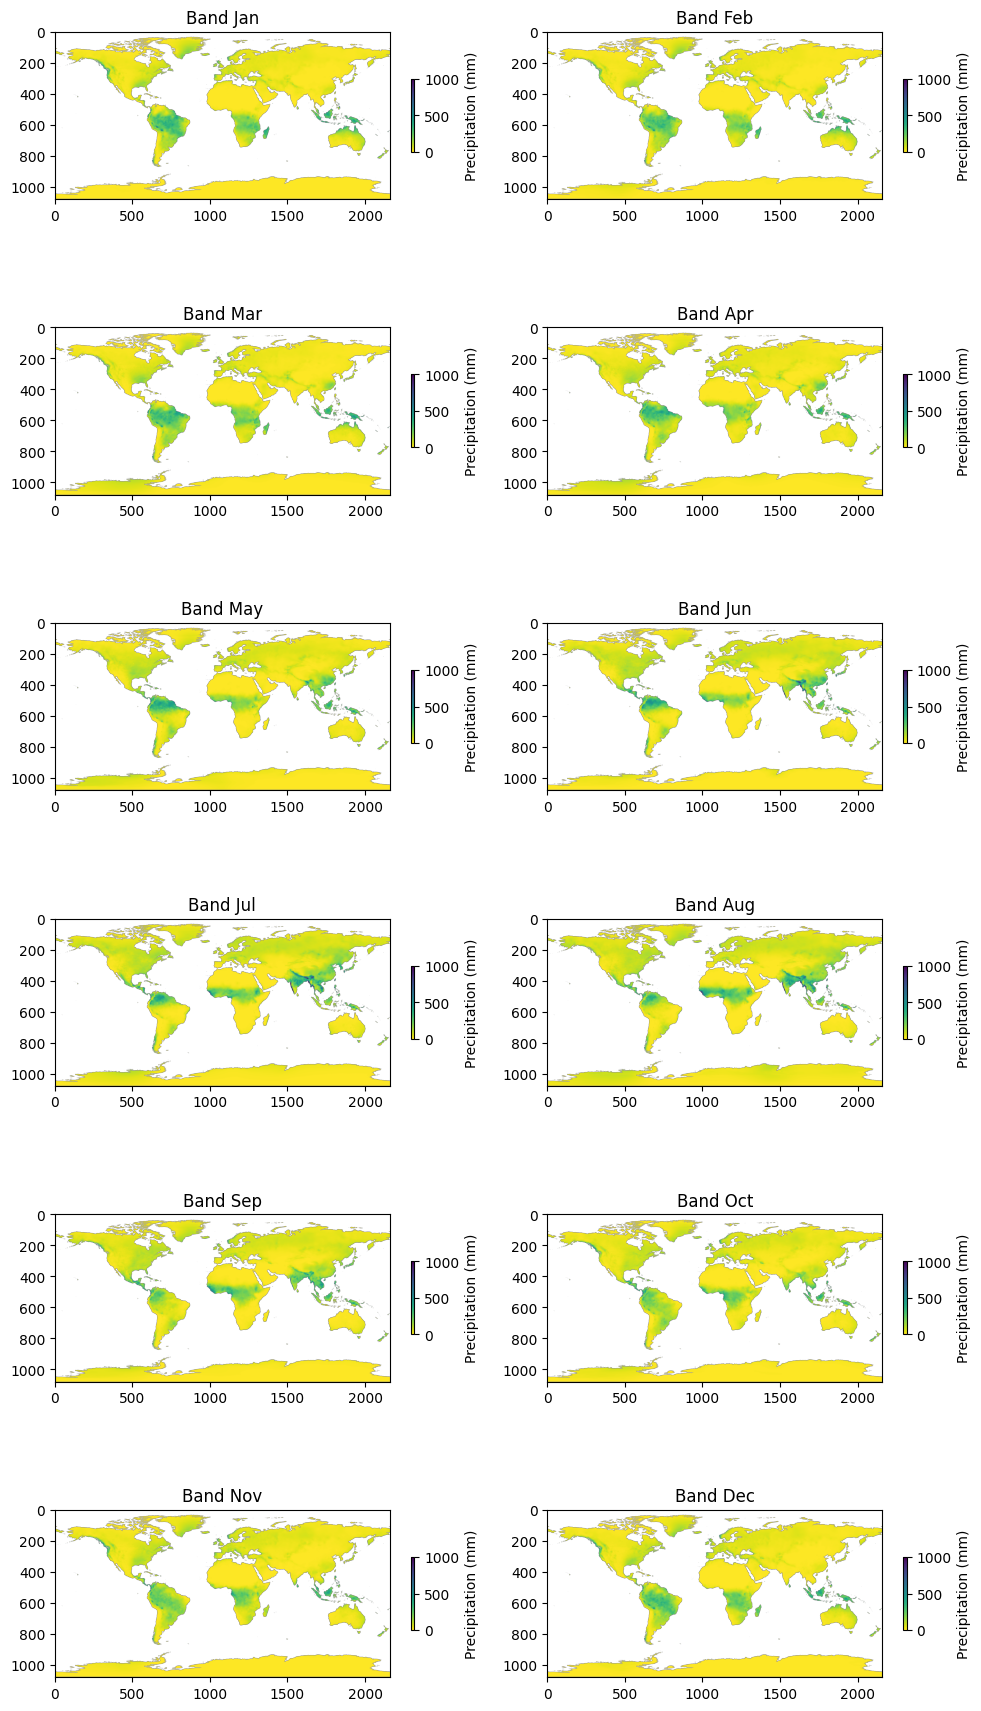

In [ ]:
fig, axes = plt.subplots(nrows=6, ncols=2, figsize=(10, 18)) #create 6 rows and 2 columns for clear visual output
axes = axes.flatten()  #flatten the 2D array of axes to 1D for easy iteration

for band in range(1, src.count + 1): #include the +1 so that the final band is still included; all bands will be plotted in separate plots
    data = src.read(band)
    ax = axes[band - 1]
    im = ax.imshow(data, cmap="viridis_r", vmin=0, vmax=1000) #use viridis_r colormap to show contrast between yellow (low precip) and blue/green (higher precip)
    ax.set_title(f"Band {band_names[band - 1]}")
    fig.colorbar(im, ax=ax, label="Precipitation (mm)", shrink=0.25) #add in colorbar scale to help interpret precipitation values

plt.tight_layout()
plt.show()

Based on the data above, we can see precipitation patters in many regions. For simplicity of analysis, we will only examine patterns across Africa.

There are 3 dominant patterns: the Sahara region, Central/West Africa, and Central/Southern Africa.
The Sahara region remains dry throughout the year. Along coasts, there is minimal precipitation in the Oct-Jan months, but otherwise almost none.

Central and West Africa show a dry season from Dec-Feb, with steadily increasing rainfall through August, where it peaks and then tapers off again.

Central/Southern Africa are drier from May-Aug, with precipitation gradually increasing through Nov and peaking in Dec-Jan before declining into April. Within this large geographic region, there is more variation- Mozambique and Tanzania's precipitation appears to peak in March, whereas Gabon seems to receive its maximum monthly precipitation in November.

To fully compare these projections with current data, we'd need to read in similar spatial resolutions with current data, but for the sake of this tutorial, we'll just draw on widely acknowledged precipitation patterns from the literature. When compared with recent historical data from Climate Research Unit (https://climateknowledgeportal.worldbank.org/country/central-african-republic/climate-data-historical), trends appear to be relatively similar, but highlight the extreme differences between wet and dry seasons. Understanding the precise timing of their onset is crucial for informing agricultural decisions.  




### Continental Precipitation Averages

For this week, I expanded the analysis to examine precipitation trends aggregated across multiple months.

*   Because there is not a consistent "wet" or "dry" season for a single continent, let alone the entire world, I sorted the data to calculate the 6 wettest months and 6 driest months, then used averages within those groupings to show precipitation patterns.
*   While these aren't perfectly indicative of what an individual country might experience in a wet or dry season, they indicate the stark changes in precipitation for much of the world during wetter months.

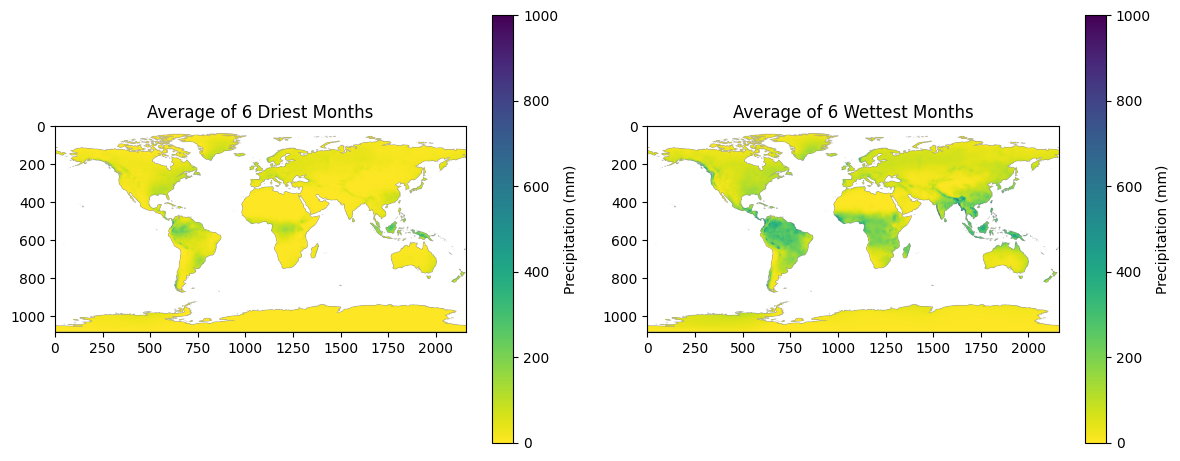

In [ ]:
import numpy as np

#re-read all bands into a single array
all_data = src.read()

#sort monthly precipitation at each pixel along the time axis (axis=0)
sorted_data = np.sort(all_data, axis=0)

#take the average of the 6 driest months
driest_6_avg = np.mean(sorted_data[:6, :, :], axis=0) #selecting the first 6 months according to sorting, then selecting all rows (latitude) and columns (longitude) values

#take the average of the 6 wettest months (last 6 in the sorted array, because the array sorted by increasing values)
wettest_6_avg = np.mean(sorted_data[6:, :, :], axis=0)

#create "dry" and "wet" plots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

dry = axes[0].imshow(driest_6_avg, cmap="viridis_r", vmin=0, vmax=1000) #min and max precipitation values, in mm
axes[0].set_title("Average of 6 Driest Months")
fig.colorbar(dry, ax=axes[0], label="Precipitation (mm)", shrink=0.75)

wet = axes[1].imshow(wettest_6_avg, cmap="viridis_r", vmin=0, vmax=1000)
axes[1].set_title("Average of 6 Wettest Months")
fig.colorbar(wet, ax=axes[1], label="Precipitation (mm)", shrink=0.75)

plt.tight_layout()
plt.show()


To compare averages across "dry" and "wet" seasons, I also calculated global averages from the previous numpy arrays. Using the nanmean accounted for NaN values from oceans, as this dataset only includes precipitation values from terrestrial areas.

In [ ]:
global_mean_driest = np.nanmean(driest_6_avg)
global_mean_wettest = np.nanmean(wettest_6_avg)

print(f"Global avg precip (driest 6 months): {global_mean_driest:.2f} mm")
print(f"Global avg precip (wettest 6 months): {global_mean_wettest:.2f} mm")

Global avg precip (driest 6 months): 23.49 mm
Global avg precip (wettest 6 months): 67.64 mm


As the maps showed, there are huge differences between the "wet" and "dry" seasons. Even without accounting for huge variation across continents, the 6 wettest months recorded an average of over double as many mm of monthly precipitation as the 6 driest months.

### Geographic clipping

For the next analysis, I wanted to zoom in on a specific country to take a closer look at its unique precipitation patterns: Brazil.

As of 2022, Brazil was the world's second-largest exporter of agricultural products and provides food security to much of Latin America. Its soybeans, corn, beef, and coffee are are also staples for China, which sources nearly a quarter of its imports from Brazil. Crops coming from Brazil feed approximately 10% of the the world.

From a climate perspective, Brazil plays a crucial role in the regulation of global patterns through the influence of the Amazon rainforest, much of which lies within Brazil's boundaries. Evapotranspiration from the rainforest results in increased water vapor in the atmosphere, which condenses and falls as precipitation near and far, depending on wind patterns. The Amazon rainforest is responsible for around 50% of all rainfall in the region, supplying moisture to farmers across the basin.

How much does Brazil's rainfall fluctuate throughout the year? To optimize agriculture, it's important for farmers to have a strong understanding of precipitation patterns for each month.

In [ ]:
!npm install --save brazilian-boundaries #brazilian-boundaries file sourced from GitHub

⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏npm warn deprecated core-js@2.6.12: core-js@<3.23.3 is no longer maintained and not recommended for usage due to the number of issues. Because of the V8 engine whims, feature detection in old core-js versions could cause a slowdown up to 100x even if nothing is polyfilled. Some versions have web compatibility issues. Please, upgrade your dependencies to the actual version of core-js.
⠏⠋⠙⠹⠸⠼⠴
added 5 packages in 4s
⠴

In [ ]:
import fiona
import rasterio.mask
import geopandas as gpd

In [ ]:
geojson_path = "/content/drive/MyDrive/BIO 109 Data Science/brazil_Brazil_Country_Boundary.geojson"
bounds = gpd.read_file(geojson_path) #import geoJSON vector file showing Brazil's national boundaries

<Axes: >

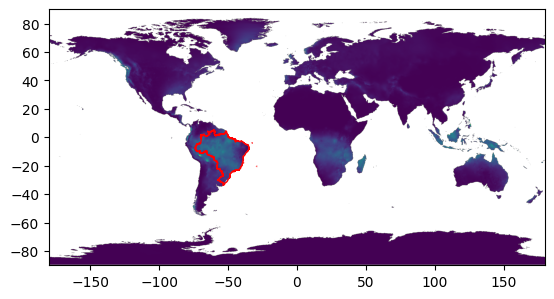

In [ ]:
fig, ax = plt.subplots()
rasterio.plot.show(src, ax=ax)
bounds.plot(ax=ax, edgecolor="red", facecolor="none") #plot the original plot, with the Brazil boundary vector overlaid

In [ ]:
with fiona.open(geojson_path, "r") as f:
    shapes = [feature["geometry"] for feature in f]

In [ ]:
out_image, out_transform = rasterio.mask.mask(src, shapes, crop=True) #clips raster file to just show the desired feature (Brazil)

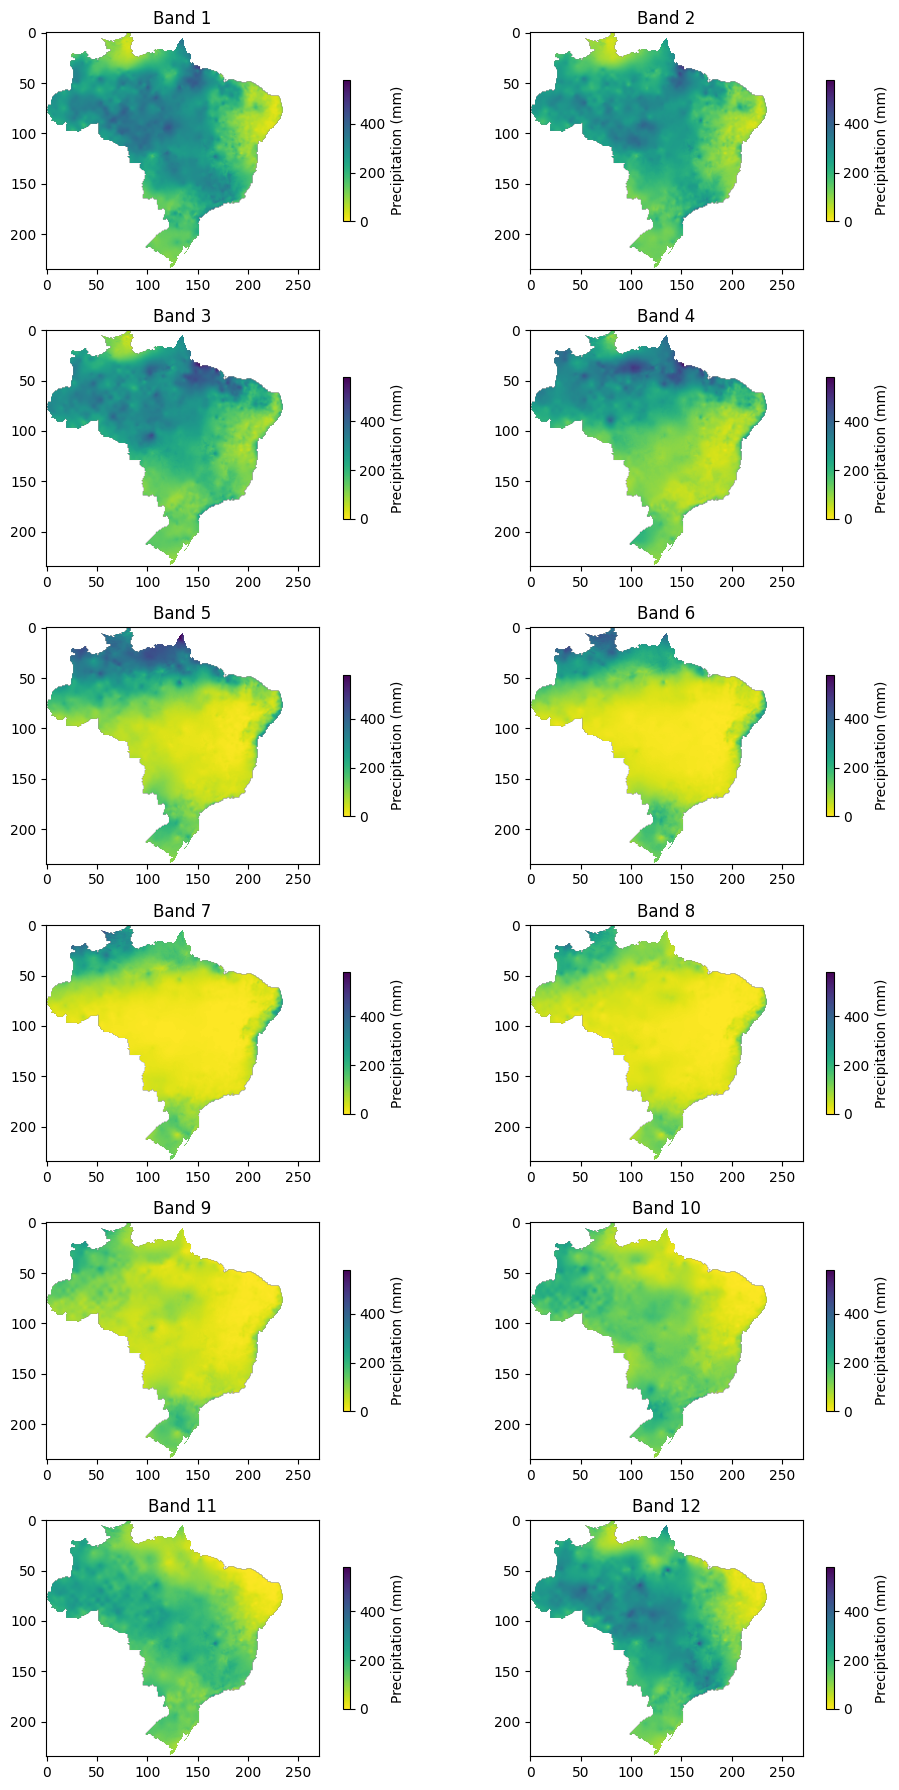

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

global_vmin = np.nanmin(out_image)  #minimum value across all bands
global_vmax = np.nanmax(out_image)  #maximum value across all bands

num_bands = out_image.shape[0]

fig, axes = plt.subplots(nrows=6, ncols=2, figsize=(10, 18))
axes = axes.flatten()

for i in range(num_bands):
    band_data = out_image[i]

    ax = axes[i]
    im = ax.imshow(band_data, cmap="viridis_r", vmin=global_vmin, vmax=global_vmax)
    ax.set_title(f"Band {i + 1}") #bands correspond to months of the year
    cbar = plt.colorbar(im, ax=ax, shrink=0.6)
    cbar.set_label("Precipitation (mm)", fontsize=10)


plt.tight_layout()
plt.show()


The clipped raster files show that precipitation is generally heaviest in the December-April months, but that it varies by region. Certain parts in the northwestern area, which is densely forested, are rainiest May-July, whereas some heavily agricultural zones in the south-central region have a shorter "wet season," with heaviest precipitation concentrated in just December and January.

# Climatic variation and crop yield



In a paper published in Nature Communications in 2015, [Ray et al.](https://doi.org/10.1038/ncomms6989) examined the influence of climatic variation on fluctuation of yields for major global crops.

Questions

*   How much of the year-to-year variability in observed crop yields is associated with variations in climate across global croplands?
*   Which climatic variables best explain variations in yield across the world?

Hypotheses

*   The authors hypothesized that variations in climate factors, such as temperature and precipitation, significantly contribute to the observed year-to-year variability in crop yields, with the strength and nature of this relationship varying by region and crop type.

Key Findings

*   Climate variability accounts for approximately one-third (32–39%) of the observed annual yield variability for maize, rice, wheat, and soybean globally.​

*   In some regions, climate variability explains over 60% of the yield fluctuations, but regions vary widely.

*   The impact of climate factors on yield variability differs by region and crop. In some areas, temperature variations are more influential, while in others, precipitation plays a more critical role, highlighting the importance of understanding these spatial relationships.


Citation:
Ray, D., Gerber, J., MacDonald, G. et al. Climate variation explains a third of global crop yield variability. Nat Commun 6, 5989 (2015). https://doi.org/10.1038/ncomms6989




### My objectives


1. Visualize the global patterns of crop yield variability based on the time series data.
2. Analyze whether total crop yield variability explained due to climate variability is higher in wetter or drier regions.
3. Ultimately, narrow this analysis to Brazil, a key producer of soybeans and maize, to compare with earlier precipitation analysis.

To execute this analysis, I will use the same dataset that Ray et al. 2015 used to produce their data. It's available in EarthStat's collection of geographic datasets on land use and agriculture.

I will use the Leafmap package to create an interactive visualization.

In [5]:
! pip install -U leafmap #install leafmap, fiona, and rasterio packages
! pip install fiona
! pip install folium matplotlib mapclassify
! pip install localtileserver
! pip install rasterio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 537.2/537.2 kB 11.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 220.7/220.7 kB 14.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 55.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.4/41.4 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.6/108.6 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 58.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 765.5/765.5 kB 35.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.2/194.2 kB 12.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.0/74.0 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 41.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.6/56.6 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 45.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.1/5

In [36]:
import leafmap #import packages
import rasterio
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as mcolors

tif = '/content/drive/MyDrive/crop yields/explanatorycat_maize.tif' #path to the .tif file on total crop yield
#variability explained due to climate variability for maize

m = leafmap.Map(center=[50, -100], zoom=10) #center the map

m.add_raster(
  tif, layer_name="Maize Raster", #add the raster, adapting the original class code for a non-COG format that only has 1 band and no band descriptions
  cmap="viridis"
)

m #show the map


Map(center=[0.0, 0.0], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_t…

The resulting Leafmap shows that in darker blue and green regions, climate variability is more weakly correlated with variability in crop yields. Based on a variety of variable feeding into their model, temperature and precipitation changes were less likely to explain changing crop yields.

Lighter green and yellow regions indicate that climate variability is more strongly correlated with crop yield variability. In these areas, changes in precipitation and temperature were very responsible for changes in output.

In [37]:
#comparing 2 crops using a split map #not quite functional still, and I'm not sure if this is a good use of a split map or not
m = leafmap.Map(center=[47.653149, -117.59825], zoom=16)
m.add_basemap("OpenTopoMap")

tif_maize = '/content/drive/MyDrive/crop yields/varcat_maize.tif'  # Pre-event raster (non-COG)
tif_soybean = '/content/drive/MyDrive/crop yields/varcat_soybean.tif'  # Post-event raster (non-COG)

# Add the raster files to the map (using add_raster for non-COG files)
m.add_raster(tif_maize)
m.add_raster(tif_soybean)
m

Map(center=[0.0, 0.0], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_t…

Next steps:

- Perform the same raster clipping operation as earlier using a vector file on Brazil's boundaries to narrow the scope of this analysis for both soybean and maize production.

- Add a colorbar to the Leafmap. I attempted to adapt the code, but think that the basemap might be incompatible, as it didn't recognize my values

In [38]:
#disable widgets from rendering #done to save it to GitHub, otherwise it won't accept the format
m = leafmap.Map(center=[39.494897, -108.507278], zoom=10)
m.show()


AttributeError: 'Map' object has no attribute 'show'